In [ ]:
! curl http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/preprocessed/enron1.tar.gz --output enron1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1760k  100 1760k    0     0   217k      0  0:00:08  0:00:08 --:--:--  351k


In [ ]:
! tar -xf enron1.tar.gz enron1

In [ ]:
! ls -1 enron1/ham/*.txt | wc -l # # of non-spam email

3672


In [ ]:
! ls -1 enron1/spam/*.txt | wc -l # # of spam email

1500


In [ ]:
! cat enron1/ham/0007.1999-12-14.farmer.ham.txt

Subject: mcmullen gas for 11 / 99
jackie ,
since the inlet to 3 river plant is shut in on 10 / 19 / 99 ( the last day of
flow ) :
at what meter is the mcmullen gas being diverted to ?
at what meter is hpl buying the residue gas ? ( this is the gas from teco ,
vastar , vintage , tejones , and swift )
i still see active deals at meter 3405 in path manager for teco , vastar ,
vintage , tejones , and swift
i also see gas scheduled in pops at meter 3404 and 3405 .
please advice . we need to resolve this as soon as possible so settlement
can send out payments .
thanks

In [ ]:
import glob, os


emails, labels = [], []
parition = 0

file_path = 'enron1/spam'

for fname in glob.glob(os.path.join(file_path, '*.txt')):
    with open(fname, 'r', encoding='ISO-8859-1') as f: 
      emails.append(f.read())
      labels.append(1)

file_path = 'enron1/ham'
for fname in glob.glob(os.path.join(file_path, '*.txt')):
    with open(fname, 'r', encoding='ISO-8859-1') as f: 
      emails.append(f.read())
      labels.append(0)

In [ ]:
print('number of emails = {}\nnumber of labels = {}'.format(len(emails), len(labels)))

number of emails = 5172
number of labels = 5172


In [ ]:
print(emails[0])

Subject: contemporary course to decrease mass !
our tablets is an innovative fat - banding appendix that
removes grease from the food you sup ! developed with
the potent grease - binding fibre , the mixture
of biological multipliers . . .
test it



In [ ]:
def letters_only(word):
  return word.isalpha()

In [ ]:
import nltk
nltk.download('names')
nltk.download('wordnet')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import names
all_names = set(names.words())

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
def clean_text(doc):
  cleaned_doc = []
  for word in doc.split(' '): # split doc. by blank (' ')
    word = word.lower() # ABD -> abd
  
    if letters_only(word) and word not in all_names and len(word) > 2: # remove number and punc. and name entity
      cleaned_doc.append(lemmatizer.lemmatize(word))
  return ' '.join(cleaned_doc) 

cleaned_emails = [clean_text(doc) for doc in emails]

In [ ]:
cleaned_emails[0]

'contemporary course decrease mass tablet innovative fat banding appendix grease from the food you sup developed potent grease binding fibre the biological multiplier'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(cleaned_emails, labels, test_size=0.33, random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=500)
term_docs_train = cv.fit_transform(X_train)
term_docs_test = cv.transform(X_test)
print(term_docs_train[5])

  (0, 132)	1
  (0, 380)	3
  (0, 125)	3
  (0, 164)	1
  (0, 24)	1
  (0, 63)	1
  (0, 85)	1
  (0, 423)	1
  (0, 31)	1
  (0, 495)	1


In [ ]:
feature_names = cv.get_feature_names()
print(feature_names[476])

wa


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1.0, fit_prior=True) # alpha: smoothing
clf.fit(term_docs_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
prediction_prob = clf.predict_proba(term_docs_test)
prediction_prob[0:10]

array([[1.00000000e+00, 6.27562619e-14],
       [3.01879050e-29, 1.00000000e+00],
       [9.99998434e-01, 1.56647382e-06],
       [1.00000000e+00, 9.11790834e-64],
       [9.99999551e-01, 4.48591127e-07],
       [7.06782107e-01, 2.93217893e-01],
       [8.40162142e-16, 1.00000000e+00],
       [9.99999988e-01, 1.24254538e-08],
       [7.06782107e-01, 2.93217893e-01],
       [9.99989090e-01, 1.09095108e-05]])

In [ ]:
prediction = clf.predict(term_docs_test)
prediction[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
confusion_matrix(Y_test, prediction, labels=[0, 1])

array([[1115,  108],
       [  75,  409]])

In [ ]:
accuracy = clf.score(term_docs_test, Y_test)
print('The accuracy using MultinomialNB is: {0:.1f}%'.format(accuracy*100))

The accuracy using MultinomialNB is: 89.3%


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(Y_test, prediction, pos_label=1))
print(recall_score(Y_test, prediction, pos_label=1))
print(f1_score(Y_test, prediction, pos_label=1))
print(f1_score(Y_test, prediction, pos_label=0))

0.7911025145067698
0.8450413223140496
0.8171828171828173
0.9241607956900125


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(Y_test, prediction)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1223
           1       0.79      0.85      0.82       484

    accuracy                           0.89      1707
   macro avg       0.86      0.88      0.87      1707
weighted avg       0.90      0.89      0.89      1707



In [ ]:
import numpy as np
pos_prob = prediction_prob[:, 1]
thresholds = np.arange(0.0, 1.2, 0.1)
true_pos, false_pos = [0]*len(thresholds), [0]*len(thresholds)
for pred, y in zip(pos_prob, Y_test):
    for i, threshold in enumerate(thresholds):
        if pred >= threshold:
            if y == 1:
                true_pos[i] += 1
            else:
                false_pos[i] += 1
        else:
            break

true_pos_rate = [tp / np.count_nonzero(Y_test) for tp in true_pos]
false_pos_rate = [fp / (len(Y_test)-np.count_nonzero(Y_test)) for fp in false_pos]

No handles with labels found to put in legend.


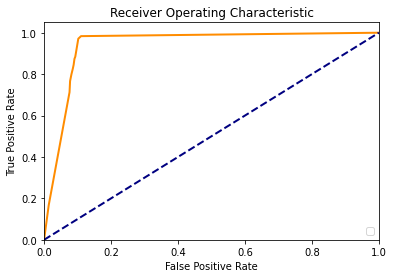

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(false_pos_rate, true_pos_rate, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, pos_prob)

0.9451828926295588

In [ ]:
from sklearn.model_selection import StratifiedKFold
k = 5
k_fold = StratifiedKFold(n_splits=k) # StratifiedKFold: suffle samples and split smaple for n folds.

# convert to numpy array for more efficient slicing
cleaned_emails_np = np.array(cleaned_emails) 
labels_np = np.array(labels)

In [ ]:
max_features_option = [2000, 4000, 8000]
smoothing_factor_option = [0.5, 1.0, 1.5, 2.0]
fit_prior_option = [True, False]
auc_record = {}

In [ ]:
for train_indices, test_indices in k_fold.split(cleaned_emails, labels):
    X_train, X_test = cleaned_emails_np[train_indices], cleaned_emails_np[test_indices]
    Y_train, Y_test = labels_np[train_indices], labels_np[test_indices]
    for max_features in max_features_option:
        if max_features not in auc_record:
            auc_record[max_features] = {}
        cv = CountVectorizer(stop_words="english", max_features=max_features)
        term_docs_train = cv.fit_transform(X_train)
        term_docs_test = cv.transform(X_test)
        for smoothing_factor in smoothing_factor_option:
            if smoothing_factor not in auc_record[max_features]:
                auc_record[max_features][smoothing_factor] = {}
            for fit_prior in fit_prior_option:
                clf = MultinomialNB(alpha=smoothing_factor, fit_prior=fit_prior)
                clf.fit(term_docs_train, Y_train)
                prediction_prob = clf.predict_proba(term_docs_test)
                pos_prob = prediction_prob[:, 1]
                auc = roc_auc_score(Y_test, pos_prob)
                auc_record[max_features][smoothing_factor][fit_prior] \
                    = auc + auc_record[max_features][smoothing_factor].get(fit_prior, 0.0)

In [ ]:
print('max features  smoothing  fit prior  auc')
for max_features, max_feature_record in auc_record.items():
    for smoothing, smoothing_record in max_feature_record.items():
        for fit_prior, auc in smoothing_record.items():
            print('       {0}      {1}      {2}    {3:.4f}'.format(max_features, smoothing, fit_prior, auc/k))

max features  smoothing  fit prior  auc
       2000      0.5      True    0.9761
       2000      0.5      False    0.9761
       2000      1.0      True    0.9737
       2000      1.0      False    0.9737
       2000      1.5      True    0.9720
       2000      1.5      False    0.9719
       2000      2.0      True    0.9705
       2000      2.0      False    0.9705
       4000      0.5      True    0.9820
       4000      0.5      False    0.9819
       4000      1.0      True    0.9802
       4000      1.0      False    0.9803
       4000      1.5      True    0.9791
       4000      1.5      False    0.9791
       4000      2.0      True    0.9783
       4000      2.0      False    0.9783
       8000      0.5      True    0.9873
       8000      0.5      False    0.9874
       8000      1.0      True    0.9863
       8000      1.0      False    0.9863
       8000      1.5      True    0.9856
       8000      1.5      False    0.9856
       8000      2.0      True    0.9853
      